1. Import Library dan Membaca dataset

In [2]:
# 1️⃣ Input Library dan Membaca Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

target_names = iris.target_names
df['target_name'] = df['target'].apply(lambda x: target_names[x])

print("5 Data Teratas:")
print(df.head())


5 Data Teratas:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   target_name        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df['target'].unique()


array([0, 1, 2])

In [5]:
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


2. Split Data


In [6]:
# 2️⃣ Split Data (80% Training - 20% Testing)
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

3. Training Model

In [7]:
# 3️⃣ Training Model & Prediksi
model=DecisionTreeClassifier(random_state=100)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=100)

4. Prediksi dan Evaluasi Model

In [8]:
y_pred = model.predict(X_test)
print("nilai prediksi:", y_pred)
print('nilai sebenarnya:', y_test)
print('\n')
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)

print("Akurasi Model:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

nilai prediksi: [2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 2 2 2 2 0 2 0 1 2 1 0 1 2]
nilai sebenarnya: [2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 1 2 2 2 0 2 0 1 2 1 0 1 2]


Akurasi Model: 0.9666666666666667
Confusion Matrix:
 [[11  0  0]
 [ 0  5  1]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.83      0.91         6
   virginica       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



5. Visualisasi data 

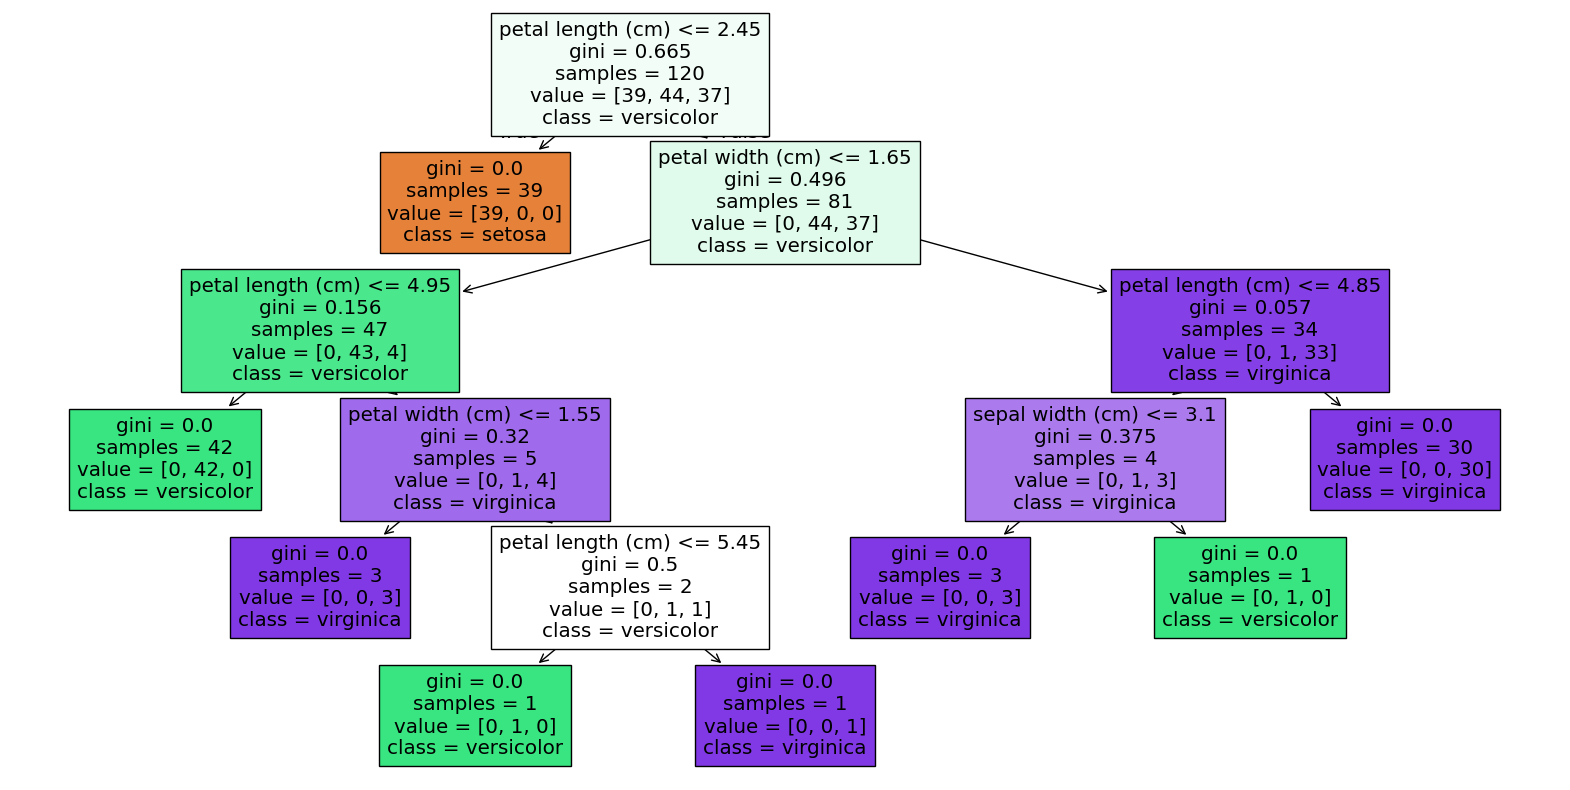

In [9]:
import matplotlib.pyplot as plt
from sklearn import tree

# Visualisasi decission tree (opsional)
plt.figure(figsize=(20,10))
tree.plot_tree(model,
               feature_names=iris.feature_names,
               class_names=iris.target_names,
               filled=True)
plt.show()

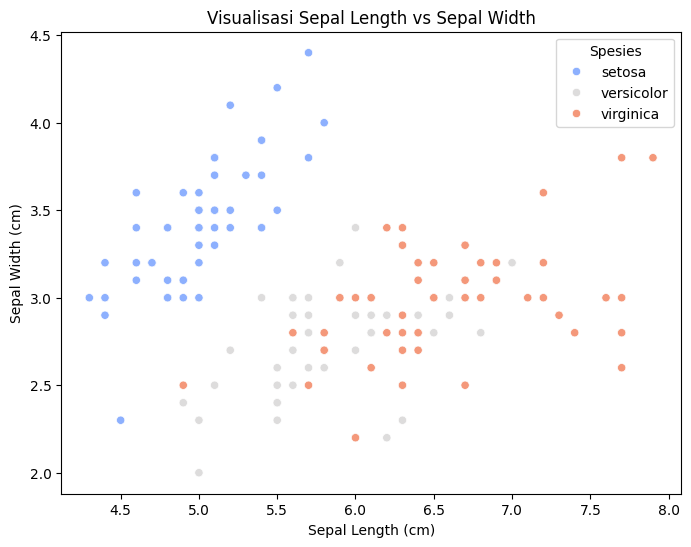

In [10]:

# 4️⃣ Visualisasi Data dengan Matplotlib
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], hue=df['target_name'], palette='coolwarm')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Visualisasi Sepal Length vs Sepal Width')
plt.legend(title='Spesies')
plt.show()


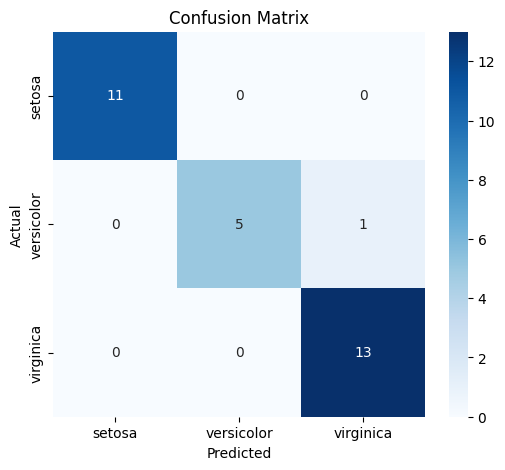

In [11]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
